In [2]:
import pandas as pd
import os
os.chdir('C:/Users/needon/Desktop/4710Dataset/SkipTheDishes_Data')
complex_df = pd.read_csv('train_orders_data_with_targets.csv')
complex_df = complex_df.fillna(0)
s_df = complex_df[['order_id','datetime','food_prep_time_minutes']]
s_df['datetime'] = pd.to_datetime(s_df['datetime'])
s_df['day_of_week'] = s_df['datetime'].dt.day_name()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
s_df['day_of_week'] = pd.Categorical(s_df['day_of_week'], categories=days)
s_df['hour'] = s_df['datetime'].dt.hour + 0.25*s_df['datetime'].dt.quarter

C:\Users\needon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\needon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\needon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [3]:
item_max = 10
quantities = []
item_count = []
for i in range(complex_df.shape[0]):
    quantity = 0
    item = 0
    for j in range(item_max):
        col_name = "quantity_{index}".format(index = str(j+1))
        quantity = quantity + complex_df.loc[i][col_name]
        if complex_df.loc[i][col_name] != 0.0:
            item = item+1
    quantities.append(quantity)
    item_count.append(item)
s_df['quantities'] =  quantities  
s_df['item_count'] = item_count
mat = s_df.values

C:\Users\needon\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\needon\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [4]:
from matplotlib import pyplot as plt
plt.figure()
s_df.groupby('day_of_week').count()['order_id'].plot(kind='bar')
plt.ylabel('count')
plt.show()

<Figure size 640x480 with 1 Axes>

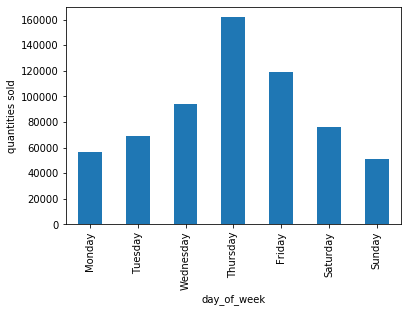

In [5]:
plt.figure()
s_df.groupby('day_of_week').sum()['quantities'].plot(kind='bar')
plt.ylabel('quantities sold')
plt.show()

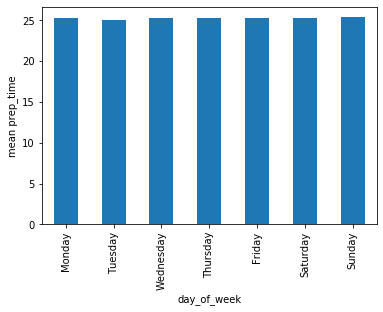

In [6]:
plt.figure()
s_df.groupby('day_of_week').mean()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('mean prep_time')
plt.show()

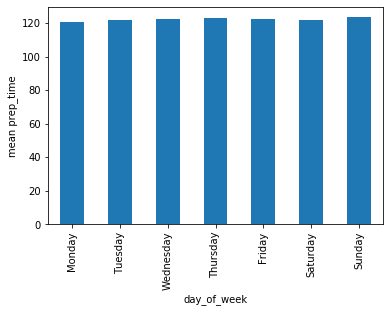

In [7]:
plt.figure()
s_df.groupby('day_of_week').var()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('mean prep_time')
plt.show()

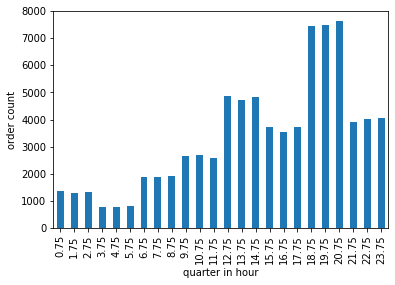

In [8]:
plt.figure()
s_df.groupby('hour').count()['order_id'].plot(kind='bar')
plt.ylabel('order count')
plt.xlabel('quarter in hour')
plt.show()

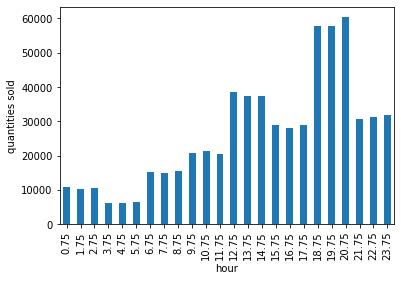

In [9]:
plt.figure()
s_df.groupby('hour').sum()['quantities'].plot(kind='bar')
plt.ylabel('quantities sold')
plt.show()

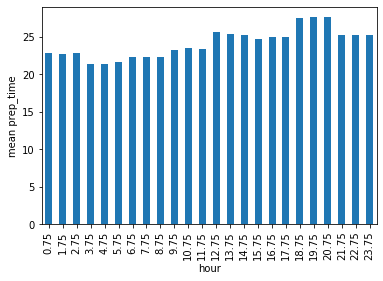

In [10]:
plt.figure()
s_df.groupby('hour').mean()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('mean prep_time')
plt.show()

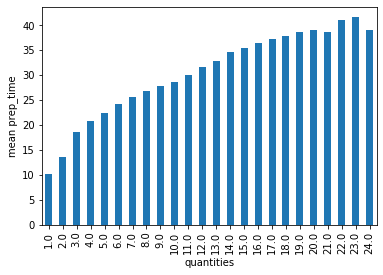

In [11]:
plt.figure()
s_df.groupby('quantities').mean()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('mean prep_time')
plt.show()

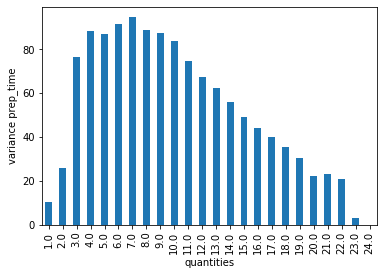

In [12]:
plt.figure()
s_df.groupby('quantities').var()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('variance prep_time')
plt.show()

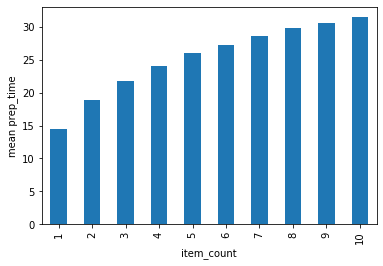

In [13]:
plt.figure()
s_df.groupby('item_count').mean()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('mean prep_time')
plt.show()

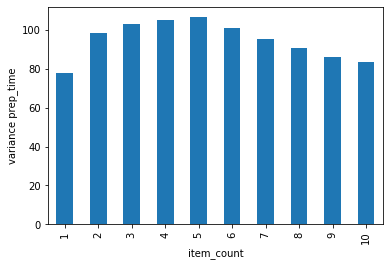

In [14]:
plt.figure()
s_df.groupby('item_count').var()['food_prep_time_minutes'].plot(kind='bar')
plt.ylabel('variance prep_time')
plt.show()